In [2]:
pip install QuantLib


  Obtaining dependency information for QuantLib from https://files.pythonhosted.org/packages/eb/96/58ad2e21aab7409fca35cbf9d100bd1a9a02a329589e173462884be5ae58/QuantLib-1.35-cp38-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/12.5 MB ? eta -:--:--
   --- ------------------------------------ 1.0/12.5 MB 32.3 MB/s eta 0:00:01
   --- ------------------------------------ 1.0/12.5 MB 32.3 MB/s eta 0:00:01
   ------ --------------------------------- 2.0/12.5 MB 16.3 MB/s eta 0:00:01
   ------ --------------------------------- 2.1/12.5 MB 16.6 MB/s eta 0:00:01
   ---------- ----------------------------- 3.1/12.5 MB 15.4 MB/s eta 0:00:01
   ---------- ----------------------------- 3.1/12.5 MB 15.4 MB/s eta 0:00:01
   ---------- ----------------------------- 3.1/12.5 MB 15.4 MB/s eta 0:00:01
   ---------- ----------------------------- 3.1/12.5 MB 15.4 MB/s eta 0:00:01
   ------------- -------------------------- 4.2/12.5 MB 10.7 MB/s eta 0:00:01
   ------------- ---

In [3]:
from QuantLib import *

In [4]:
today = Date(9, November, 2022)
Settings.instance().evaluationDate = today

In [5]:
strike = 100
maturity = Date(9, March, 2023)
option = EuropeanOption(PlainVanillaPayoff(Option.Call, strike),
                       EuropeanExercise(maturity))

In [6]:
#First pricing method: Black Scholes
S0 = SimpleQuote(100)
r = SimpleQuote(0.01)
sigma = SimpleQuote(0.2)

In [7]:
riskFreeCurve = FlatForward(0, TARGET(), QuoteHandle(r), Actual360())
volatility = BlackConstantVol(0, TARGET(), QuoteHandle(sigma), Actual360())

In [8]:
process = BlackScholesProcess(QuoteHandle(S0), 
                             YieldTermStructureHandle(riskFreeCurve),
                             BlackVolTermStructureHandle(volatility))

In [9]:
engine = AnalyticEuropeanEngine(process)

In [10]:
option.setPricingEngine(engine)

In [11]:
print(option.NPV())

4.764672202466294


In [12]:
print(option.delta())
print(option.gamma())
print(option.vega())

0.534506276720217
0.034420097263283135
22.94673150885543


In [13]:
#Market Changes
S0.setValue(105)
print(option.NPV())

7.849230058037261


In [14]:
#Plot NPV vs S0
#%%capture
%pylab inline --no-import-all
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


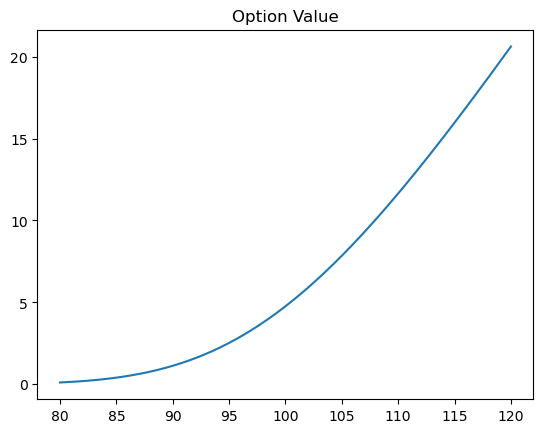

In [15]:
f, ax = plt.subplots()
xs = np.linspace(80,120,400)
ys = []
for x in xs:
    S0.setValue(x)
    ys.append(option.NPV())
ax.set_title('Option Value')
_ = ax.plot(xs,ys)

In [16]:
#Date Changes
S0.setValue(105)
print(option.NPV())

7.849230058037261


In [17]:
Settings.instance().evaluationDate = Date(9, January, 2023)
print(option.NPV())

6.510206818761075


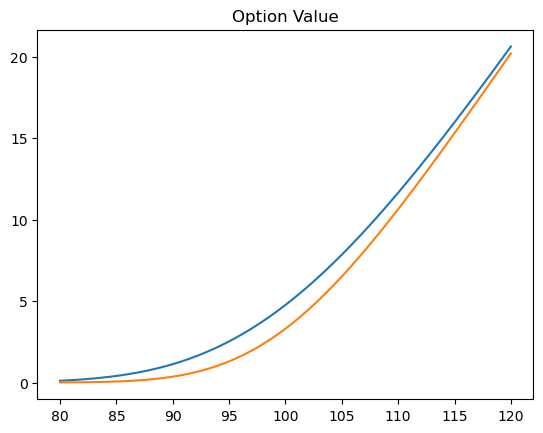

In [18]:
ys = []
for x in xs:
    S0.setValue(x)
    ys.append(option.NPV())
ax.plot(xs, ys)
display(f)

In [19]:
Settings.instance().EvaluationDate=Date(9, February, 2023)

In [20]:
Settings.instance().EvaluationDate=Date(8, March, 2023)

In [21]:
#Other pricing methods
Settings.instance().evaluationDate=today
S0.setValue(105)

In [22]:
model = HestonModel(
    HestonProcess(YieldTermStructureHandle(riskFreeCurve),
                 YieldTermStructureHandle(FlatForward(0, TARGET(),0,Actual360())),
                 QuoteHandle(S0),
                 0.04,0.1,0.01,0.05,-0.75))

In [23]:
engine = AnalyticHestonEngine(model)
option.setPricingEngine(engine)

In [24]:
print(option.NPV())

7.864855245050127


In [25]:
#Lazy Recalculation
engine = MCEuropeanEngine(process, "PseudoRandom", timeSteps=20,
                          requiredSamples=250000)
option.setPricingEngine(engine)

In [26]:
print(option.NPV())

7.851072299339666


In [27]:
S0.setValue(104)

In [28]:
print(option.NPV())

7.163961703611544
